<font size = +4>Predicting Weather using ML.</font>

In [2]:
#importing the libraries needed for this project
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
#importing the file needed for this task.

In [4]:
data = pd.read_csv(r"C:\Users\user\Downloads\1. Weather Data.csv")
#Displaying the first 5 rows of the data set.
data.head(n = 1000)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
995,2/11/2012 11:00,-13.1,-18.8,62,11,24.1,101.03,Snow
996,2/11/2012 12:00,-12.8,-17.2,70,9,19.3,100.97,Snow
997,2/11/2012 13:00,-12.1,-16.4,70,7,24.1,100.85,Mostly Cloudy
998,2/11/2012 14:00,-11.3,-17.4,61,6,48.3,100.76,Mainly Clear


<font size = +2>**Data Dictionary**</font>

<font size=+0.5>Date/Time: Date and time of the weather.<br>
Temp_C: Temperature record in celcius<br>
Dew Point Temp_C: Dew point temperature of the weather.<br>
Rel Hum_%: Relative Humidity of the temperature:<br>
Wind Speed_km/h: The wind speed of the weather per hour.<br>
Visibility_km: The appearance of a distant object against a contrasting background usually the sky.<br>
Press_kpa: Pressure measurement of the weather.<br>
Weather: The resulting weather condition for the day.</font>

<font size = +1>**Exploratory Data Analysis**</font>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


Our data info describes data type of each column, it also describes the null property of each cell in the data cell.

In [6]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


Describe function describes the statistical properties of the numerical columns, Press_kPa and Rel Hum have values 
greater than other columns which we will handle later on by standardizing these columns before training with our model.

In [7]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

Total count for unique values in each column.

In [8]:
#checking to see if our datasets has any duplicate value.
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Length: 8784, dtype: bool

This determines if our data has duplicated values.

<font size = +1>**Quantitative Analysis**</font>

In [9]:
#Quantitative variables:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa'],
      dtype='object')


In [10]:
data[quantitative].describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


<font size = +1>**Correlation between our columns**</font>

In [184]:
data.corr()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


<font size = +2>Plot 

In [11]:
from matplotlib.pyplot import rcParams

array([[<AxesSubplot:title={'center':'Temp_C'}>,
        <AxesSubplot:title={'center':'Dew Point Temp_C'}>],
       [<AxesSubplot:title={'center':'Rel Hum_%'}>,
        <AxesSubplot:title={'center':'Wind Speed_km/h'}>],
       [<AxesSubplot:title={'center':'Visibility_km'}>,
        <AxesSubplot:title={'center':'Press_kPa'}>]], dtype=object)

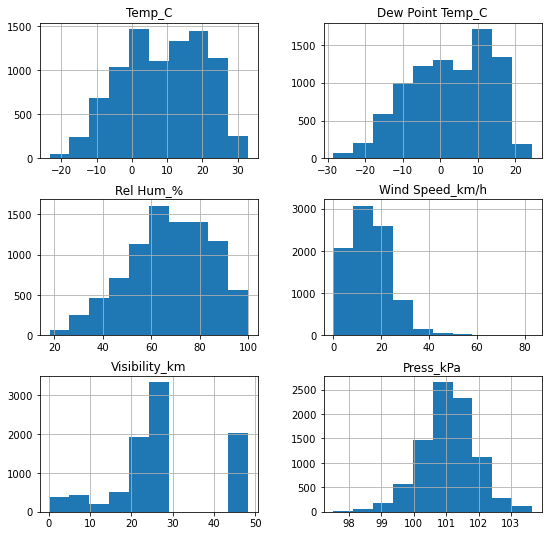

In [12]:
rcParams['figure.figsize'] = 9, 9
data[quantitative].hist()

In [13]:
#Let's examine the weather column we are trying to predict and also the value count of each value in the column
data['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [37]:
data.loc[data['Weather'].str.lower().str.contains('rain'), 'Weather'] = 'Rain'
data.loc[data['Weather'].str.lower().str.contains('snow'), 'Weather'] = 'Snow'
data.loc[data['Weather'].str.lower().str.contains('fog'), 'Weather'] = 'Fog'
data.loc[data['Weather'].str.lower().str.contains('clear'), 'Weather'] = 'Clear'
data.loc[data['Weather'].str.lower().str.contains('cloudy'), 'Weather'] = 'Cloudy'
data.Weather.value_counts()

Cloudy                   3797
Clear                    3432
Rain                      689
Snow                      556
Fog                       241
Drizzle                    41
Haze                       16
Freezing Drizzle            7
Freezing Drizzle,Haze       3
Thunderstorms               2
Name: Weather, dtype: int64

**Weather column has a high cardinality of 50 which are not distributed evenly with some values appearing just once. This will pose a problem for our models because some values won't appear while training the models with our data. To navigate this problem we will reclassify the weather column into 4 different cardinals.**

In [38]:
#We can also confirm the cardinality of other columns that are equal or greater than 50 
max_cardinality = 50
high_cardinality = [col for col in data.select_dtypes(exclude=np.number)
                   if data[col].nunique() >= max_cardinality]
print(high_cardinality)

['Date/Time']


Date/Time and Weather are the only columns with cardinality numbering 50 or more. Since Date/Time is has no effect on our prediction, there won't be of any benefit since they won't be affecting our dataset.

<font size = +1>***Regrouping Weather column***</font>

The library needed to perform this will be imported after which a function is defined to perform the regrouping.

In [39]:
#To do this we have to import Counter from the collection library
from collections import Counter

The function(re_categorize) will return a new column bearing names of the previous values that falls under the threshold and other names outside the threshold will bear others, it will also return a category list whcih will be dependent on the boolean parameter.

In [40]:
def re_categorize(column, threshold = 0.90, return_category = True):
    
    #The threshold_value is the total number of values in the column
    threshold_value = int(threshold*len(column))
    
    #initialize a category_list for our new values.
    category_list = []
    
    #instantiate a variable that will be used to calculate the sum of frequencies
    x = 0
    #Create a counter dictionary for the from unique_value: frequency
    count = Counter(column)
    
    
    #next a for loop is defined to iterate through the count values and frequency while 
    #sorting it using the frequency in the order of descending
    for i,j in count.most_common():
        #sum up the frequency of the value and instance of x
        x+= dict(count)[i]
        
        #append the category name to the list.
        category_list.append(i)
        
        #check to confirm that the instance x is not higher than the threshold, if it is higher you break.
        if x >= threshold_value:
            break
    #Append the value Other to the category_list
    category_list.append('Other')
    
    #Next we replace all instances not in our category_list with Other using apply and lambda functions
    new_column = column.apply(lambda x: x if x in category_list else 'Other')
    
    #We return the new_column and category_list if the boolean value is True else we return only new_column
    if return_category:
        return new_column, category_list
    else:
        return new_column

#Call the function with a default threshold of 75% assigning the values to two variables.
transformed_column, new_category_list = re_categorize(data['Weather'])


#display the newly transformed column and category list.
print(transformed_column.head(), new_category_list)

0    Other
1    Other
2    Other
3    Other
4    Other
Name: Weather, dtype: object ['Cloudy', 'Clear', 'Rain', 'Other']


In [69]:
#assign the values from the transformed_column to the data sets after which we will conduct a prelimary test to see if they match each row.
data['New_Weather'] = transformed_column
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,New_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Other
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Other
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,Fog,Other
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,Fog,Other
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,Other


In [42]:
#Check the value counts of the values in our new weather column
data.New_Weather.value_counts()

Cloudy    3797
Clear     3432
Other      866
Rain       689
Name: New_Weather, dtype: int64

Categorical Variable

<AxesSubplot:xlabel='count', ylabel='New_Weather'>

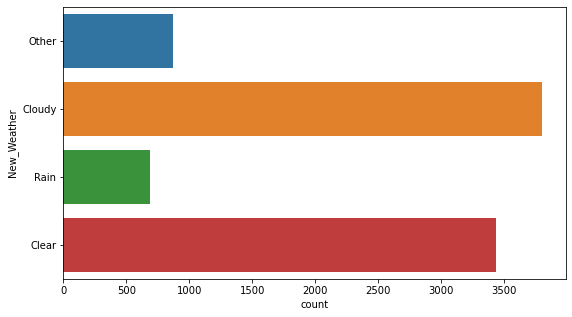

In [187]:
rcParams['figure.figsize'] = 9, 5
sns.countplot(y=data['New_Weather'])

Scale the numerical values in the feature column

In [71]:
#import library used in scaling
from sklearn import preprocessing as pr
from sklearn.preprocessing import StandardScaler

In [180]:
#Scale the values in the feature columns so they can be easier to compare 
features = data[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]

x_scaled = pr.scale(features)
x = x_scaled
print(x.view())

[[-0.90681502 -0.59318371  1.09755264 -1.25980838 -1.55795388  0.22320647]
 [-0.90681502 -0.5748055   1.15666157 -1.25980838 -1.55795388  0.22320647]
 [-0.90681502 -0.54723818  1.27487942 -0.91451252 -1.87486163  0.24690437]
 ...
 [-0.79558239 -0.37264519  1.51131513  1.5025585  -1.81148008 -1.30530797]
 [-0.76991332 -0.40021251  1.27487942  1.5025585  -1.42326809 -1.35270376]
 [-0.7528006  -0.42777982  1.09755264  1.73275574 -1.29650499 -1.37640166]]


In [181]:
#Instantiate Y with the label column
y = data['New_Weather']

<font size = +2>**Machine Learning Libraries**</font>

In [169]:
#Import the libraries needed to create and train the models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#model 1
from sklearn.linear_model import LogisticRegression
#model 2
from sklearn.ensemble import RandomForestClassifier as RFC
#Model 3
from sklearn.linear_model import Ridge
#Mode 4
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#Model 5
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
#Model 6
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

<font size = +1>**Prunnig Library**</font>

In [170]:
#Library for pruning our models to preent overfitting
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [171]:
#training and splitting the data into x(train, test) and y(train, test)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=42, shuffle = True)

<font size = +1>**1. Logistic Regression**</font>

In [75]:
#Assign LogisticRegression to logreg 
logreg = LogisticRegression()
#Fit the x and y train values into the fit function in logistic.fit function
logreg.fit(x_train,y_train)
#make predictions using the x_train values this will enable us to measure the accuracy of the model
y_pred = logreg.predict(x_train)

#print the train accuracy score and the test accuracy score, numbers above o.7 indicates that the model is fair accurate
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,logreg.predict(x_test)))

Train accuracy score: 0.61021773160666
Test accuracy score: 0.6112692088787707


<font size = +1>**2. Random Forest Classifier**</font>

In [173]:
#assigning RFC(Random forest classifier) to rfc
rfc_b = RFC()
#fitting the x and y (train) values to the RFC function
rfc_b.fit(x_train,y_train)
#predicting the values of y_train values using x_train values after fitting
y_pred = rfc_b.predict(x_train)
#printing the accuracy score of our model
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,rfc_b.predict(x_test)))

Train accuracy score: 1.0
Test accuracy score: 0.7273762094479226


<font size = +0.5>**2.1 Using prunning to prevent our model from overfitting**</font>

We will use gridsearchcv to determine the best parameters for our model parameters.

In [174]:
param_rfc = {
    "max_depth": list(range(1, 20)),
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

rfc_model = RFC(random_state=42)
grid_rfc_cv = GridSearchCV(rfc_model, param_rfc, n_jobs=-1, cv=3).fit(x_train, y_train)

print("Param for GS", grid_cv.best_params_)
print('Test accuracy score:', accuracy_score(y_train, grid_rfc_cv.predict(x_train)))
print('Test accuracy score:', accuracy_score(y_test, grid_rfc_cv.predict(x_test)))

Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test accuracy score: 0.9967269104881172
Test accuracy score: 0.7245304496300512


This model is more accurate than the logistic model initially used, with train accuracy score of 1 and test accuracy score of 0.5(this is poor considering that it is 0.2 points below the 0.7)

<font size = +1>**3. Ridge**</font>

We will first determine the best value for alpha parameter using RidgeCV 

In [83]:
#Replace the string attributes of the label column with integer numbers
y_replaced = data['New_Weather'].replace({'Clear':0, 'Cloudy':1,'Rain':2, 'Other':4})
print(y_replaced.dtype)

y_scaled = pr.scale(y_replaced)
#assigning new train and test values to our x and y
x_trained, x_tested, y_trained, y_tested = train_test_split(x, y_replaced, train_size=0.80, random_state=42, shuffle = True)

#Define cross-validation method to validate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

#Using cross validation determine the best value for alpha/lamda
model = RidgeCV(alphas=[0.1, 1.0, 10], cv=cv)
model.fit(x_trained, y_trained)
print("Alpha", model.alpha_)

int64
Alpha 0.1


<font size = +0.5>**3.2 Using the generated alpha value which we will input into the model as our parameter for our prediction**</font>

In [92]:
#instantiating ridge with the Ridge function from our library
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(x_trained, y_trained)

#predicting our y labels with their respective x_trained values
y_prob = ridge_model.predict(x_trained)
#Convert the predicted values of y to whole numbers 
y_pred = np.around(y_prob)

#Predict and convert the label values for the test features 
y_test = np.around(model.predict(x_tested))
#test_preds = np.asarray([np.round(line) for line in yp_test])
#Next, check for the accuracy of the model
print(accuracy_score(y_pred, y_trained))
print(accuracy_score(y_test, y_tested))

0.46776718371993736
0.4746727376209448


<font size = +1>**4. KNeigborsClassifier Model**</font>

In [103]:
#Instantiate a variable with the model Kneighborsclassifier 
knn = KNeighborsClassifier()
#Fit and train the data sets
knn.fit(x_train,y_train)
#Using the model, predict the values of trained labels then check for accuracy.
y_Kpred = knn.predict(x_train)
print(y_Kpred.view)
print('Train accuracy score:',accuracy_score(y_train,y_Kpred))
print('Test accuracy score:',accuracy_score(y_test,knn.predict(x_test)))

<built-in method view of numpy.ndarray object at 0x0000024AFDDF3390>
Train accuracy score: 0.7727337412836203
Test accuracy score: 0.6579396698918611


<font size = +1>**5. Linear Regression**</font>

In [132]:
y_replace = data['New_Weather'].replace({'Clear':0, 'Cloudy':1,'Rain':2, 'Other':4})
x_trains, x_tests, y_trains, y_tests = train_test_split(x, y_replace, train_size=0.80, random_state=42, shuffle = True)

#Instantiate a variable with the LinearRegression model
lr = LinearRegression()
#Fit the data sets into the model
lr.fit(x_trains, y_trains)
#Predict the y label using the x features
y_train_pred = lr.predict(x_trains)
#Convert the predicted y values to whole number
y_train_pred_int = y_train_pred.astype(int)

#Predict the y lable for the test data and convert to whole numbers
y_test_pred = lr.predict(x_test)
y_test_pred_int = y_test_pred.astype(int)

print(accuracy_score(y_trains, y_train_pred_int))
print(accuracy_score(y_tests, y_test_pred_int))

0.5063327166642949
0.504268639726807


<font size = +1>**6. DecisionTreeClassifier**</font>

In [147]:
#instantiate a variable with the decisiontreeclassifier model
dtc = DecisionTreeClassifier(random_state = 42)
#Fit the data into the model
dtc.fit(x_trains, y_trains)

#Use the model to predict the values of the trained label
y_dtc_pred = dtc.predict(x_trains)

print(accuracy_score(y_trains, y_dtc_pred))
print(accuracy_score(y_tests, dtc.predict(x_tests)))


1.0
0.6363118952760387


The model overfits our data, there will be need to prune the parameters of our data.

<font size = +0.5>**6.1 Using prunning to prevent our model from overfitting.**</font>

In [175]:
param_grid = {
    "max_depth": list(range(10, 20)),
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_trains, y_trains)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print(accuracy_score(y_trains, grid_cv.predict(x_trains)))
print(accuracy_score(y_tests, grid_cv.predict(x_tests)))
#print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(x_trains)))
#print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(x_tests)))

Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS nan
0.7637683221858546
0.6556630620375641


<font size=+2>**Conclusion:**</font>

With exception to prunning, KNeighborsClassifier appears to be the best ML algorithm for predicting weather, although other models such as Random Forest Classifier(RFC) and Decision Tree Classifier showed significant improvent with our training data and test data after prunning. Random Forest Classifier(RFC) performed better than other model after prunning.